In [7]:
#1. 파일불러서 datagram 생성
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('C:/Users/User/Downloads/car.data')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [2]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [3]:
#2. 결측치 제거
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

Text(0.5, 1.0, 'Label')

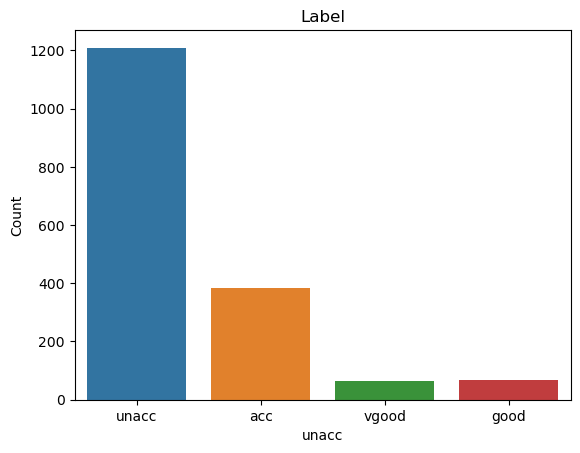

In [9]:
#3. 라벨링 그래프 표시 (라벨링 = class)
sns.countplot(data = data, x="unacc")
plt.xlabel("unacc")
plt.ylabel("Count")
plt.title("Label")

In [10]:
#4. 모든 칼럼을 숫자로 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [11]:
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [12]:
X = data.loc[:,['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low']].values
y = data.loc[:,'unacc'].values

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [14]:
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [15]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [16]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 10ms/step - loss: 0.7744 - accuracy: 0.7314 - val_loss: 0.7441 - val_accuracy: 0.7225
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.7683 - val_loss: 0.6439 - val_accuracy: 0.7428
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.7581 - val_loss: 0.6649 - val_accuracy: 0.7254
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7705 - val_loss: 0.5954 - val_accuracy: 0.7514
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.7690 - val_loss: 0.5411 - val_accuracy: 0.7428
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.7748 - val_loss: 0.5070 - val_accuracy: 0.7919
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8088 - val_loss: 0.4897 - val_accuracy: 0.8179
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2168 - accuracy: 0.9276 - val_loss: 0.3605 - val_accuracy: 0.8960
Epoch 60/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.9001 - val_loss: 0.3657 - val_accuracy: 0.9220
Epoch 61/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9095 - val_loss: 0.1838 - val_accuracy: 0.9364
Epoch 62/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9312 - val_loss: 0.1690 - val_accuracy: 0.9277
Epoch 63/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1933 - accuracy: 0.9218 - val_loss: 0.2304 - val_accuracy: 0.9133
Epoch 64/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9298 - val_loss: 0.1440 - val_accuracy: 0.9451
Epoch 65/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9464 - val_loss: 0.1605 - val_accuracy: 0.9509
Epoch 

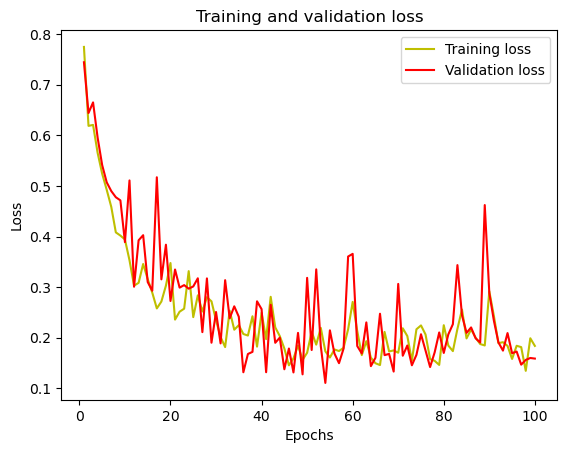

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

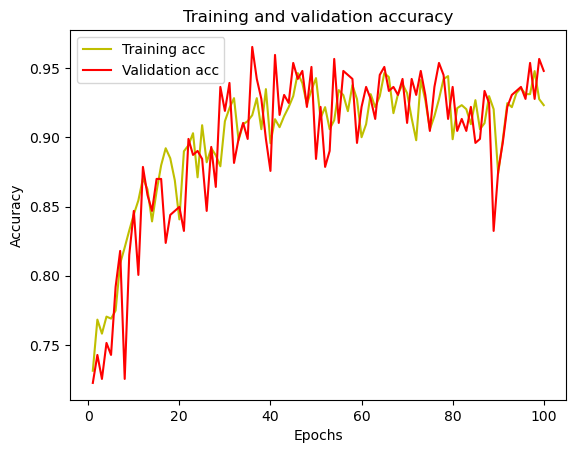

In [19]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        77
           1       0.87      0.93      0.90        14
           2       0.98      0.96      0.97       239
           3       0.93      0.88      0.90        16

    accuracy                           0.95       346
   macro avg       0.91      0.92      0.92       346
weighted avg       0.95      0.95      0.95       346

[[ 72   0   4   1]
 [  1  13   0   0]
 [ 10   0 229   0]
 [  0   2   0  14]]


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (6,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2,660
Trainable params: 2,660
Non-trainable params: 0
_________________________________________________________________


In [22]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 1s 9ms/step - loss: 0.1784 - mse: 0.1784 - val_loss: 0.1111 - val_mse: 0.1111
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0976 - mse: 0.0976 - val_loss: 0.1031 - val_mse: 0.1031
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0892 - mse: 0.0892 - val_loss: 0.0957 - val_mse: 0.0957
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.0911 - val_mse: 0.0911
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0803 - mse: 0.0803 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0764 - mse: 0.0764 - val_loss: 0.0814 - val_mse: 0.0814
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 8/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0686 - m

44/44 [==============================] - 0s 4ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 64/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0330 - val_mse: 0.0330
Epoch 65/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 66/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 67/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0325 - val_mse: 0.0325
Epoch 68/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 69/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 70/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0236 - mse: 0

In [23]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0336 - mse: 0.0336


[0.033617034554481506, 0.033617034554481506]

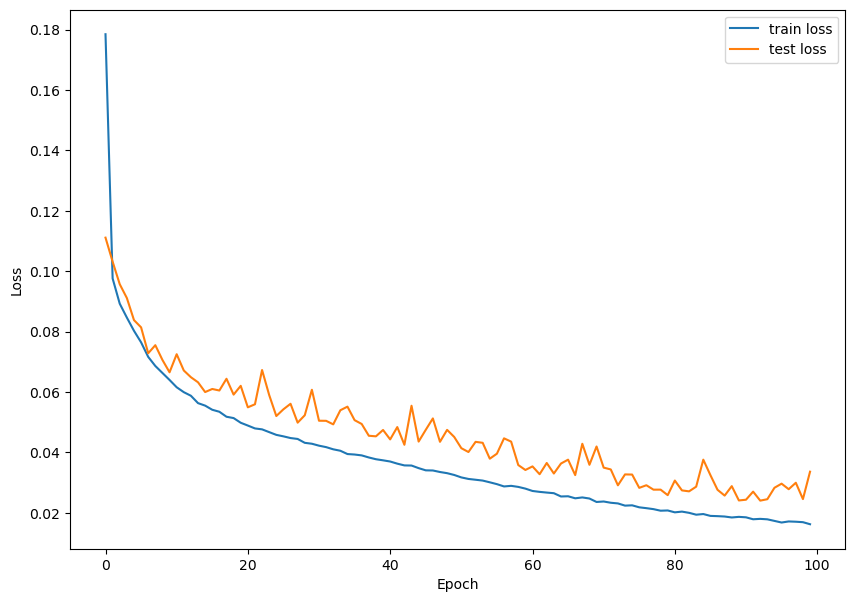

In [24]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

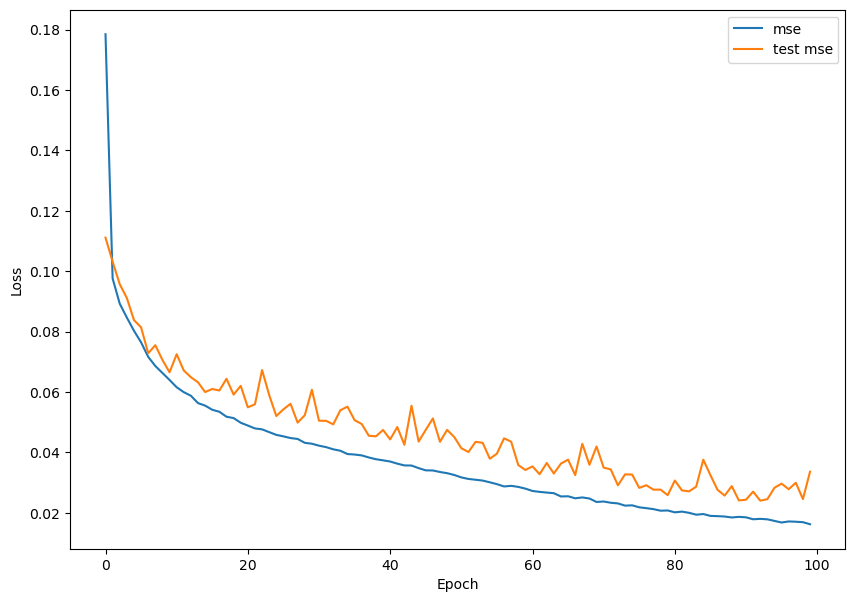

In [25]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()